In [13]:
%matplotlib inline

import random
from itertools import islice
from typing import Generator

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

sns.set(style='whitegrid')

# Задание 2

In [14]:
def geometric_generator(p: float = 0.5) -> Generator[int, None, None]:
    while True:
        n = 0
        while random.random() > p:
            n += 1
        yield n

In [15]:
def binomial_generator(p: float = 0.5, n: int = 10) -> Generator[int, None, None]:
    while True:
        k = 0
        for i in range(n):
            if random.random() > p:
                k += 1
        yield k

## Упражнение 1.
Составить программу для вычисления выборочного среднего значения, дисперсии и относительной флуктуации для __геометрического__ распределения с параметром $p$.

Убедиться, что с увеличением $N_t = 10^3, 10^5, 10^7$ их значения стремятся к тому, что следует из теории вероятностей.

In [16]:
n_points = [10 ** 3, 10 ** 5, 10 ** 7]

In [17]:
points = np.array([np.fromiter(geometric_generator(), int, n) for n in n_points])

In [18]:
mean = np.array([np.mean(p) for p in points])
std = np.array([np.std(p) for p in points]) ** 2
rf = np.sqrt(std) / mean

df = pd.DataFrame(dict(
    n_points=n_points,
    mean=mean,
    std=std,
    rf=rf,
))
df

,n_points,mean,std,rf
0,1000,1.007000,2.288951,1.502411
1,100000,1.003600,2.003807,1.410481
2,10000000,0.999924,1.999456,1.414128


## Упражнение 2.
Составить программу для вычисления выборочного среднего значения, дисперсии и относительной флуктуации для __биномиального__ распределения с параметром $p$.

Убедиться, что с увеличением $N_t = 10^3, 10^5, 10^7$ их значения стремятся к тому, что следует из теории вероятностей.

In [19]:
n_points = [10 ** 3, 10 ** 5, 10 ** 7]

In [22]:
points = np.array([np.fromiter(binomial_generator(), int, n) for n in n_points])

In [23]:
mean = np.array([np.mean(p) for p in points])
std = np.array([np.std(p) for p in points]) ** 2
rf = np.sqrt(std) / mean

df = pd.DataFrame(dict(
    n_points=n_points,
    mean=mean,
    std=std,
    rf=rf,
))
df

,n_points,mean,std,rf
0,1000,5.011000,2.626879,0.323441
1,100000,5.002200,2.489915,0.315451
2,10000000,4.999187,2.500327,0.316300


## Упражнение 3.
Составить программу для моделирования вероятностей __геометрического__ распределения с параметрами $n$, $p$.

Провести расчет при $N_t = 10^3, 10^5, 10^7$.

Сравнить с тем, что говорит теория вероятностей.

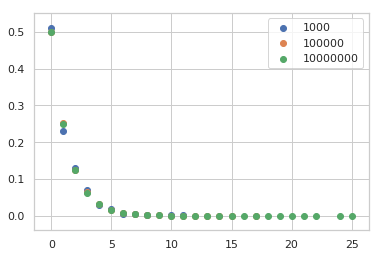

In [28]:
gen = geometric_generator()

for n in [10 ** 3, 10 ** 5, 10 ** 7]:
    points = list(islice(gen, n))
    uniques = list(sorted(set(points)))
    plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques], label=f'{n}')

plt.legend()
plt.show()

## Упражнение 4.
Составить программу для моделирования вероятностей биномиального распределения с параметрами $n$, $p$.

Провести расчет при $N_t = 10^3, 10^5, 10^7$.

Сравнить с тем, что говорит теория вероятностей.

1000 computed


100000 computed


10000000 computed


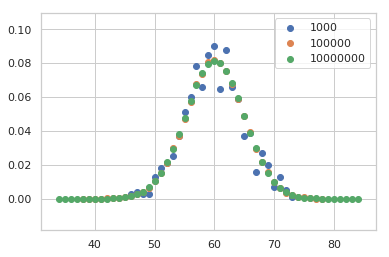

In [30]:
gen = binomial_generator(p=0.4, n=100)

for n in [10 ** 3, 10 ** 5, 10 ** 7]:
    points = list(islice(gen, n))
    uniques = list(sorted(set(points)))
    plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques], label=f'{n}')
    print(f'{n} computed')

plt.legend()
plt.show()

## Упражнение 5.
Найти среднее значение и вероятности различных значений суммы очков на трех игральных кубиках.

In [55]:
def multiple_dices_generator(n_dices: int = 3) -> Generator[int, None, None]:
    choices = (1, 2, 3, 4, 5, 6)

    while True:
        yield sum(random.choices(choices, k=n_dices))


1000 computed
mean=10.488


100000 computed
mean=10.52586


10000000 computed
mean=10.4999986


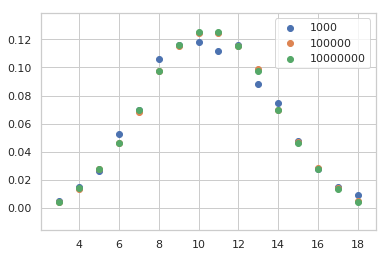

In [58]:
gen = multiple_dices_generator()

for n in [10 ** 3, 10 ** 5, 10 ** 7]:
    points = list(islice(gen, n))
    uniques = list(sorted(set(points)))
    plt.scatter(x=uniques, y=[points.count(u) / n for u in uniques], label=f'{n}')
    print(f'{n} computed')
    print(f'mean={sum(points) / n}')

plt.legend()
plt.show()